In [1]:
def detect_drift_iks(df_train, df_test):

  iks_statistics = [] # collect statistics generated by IKS
  iks = IKS() # group 0 = reference; group 1 = sliding

  sliding = deque()

  for _, row in df_train.iterrows():
    iks.Add((row, random()), 0)
    wrnd = (row, random()) # we only need to keep RND component for values in the sliding window
    iks.Add(wrnd, 1)
    sliding.append(wrnd)

  # process sliding window
  for _, row in df_test.iterrows():
    iks.Remove(sliding.popleft(), 1)
    wrnd = (row, random())
    iks.Add(wrnd, 1)
    sliding.append(wrnd)

    iks_statistics.append(iks.KS())
  
  return iks_statistics


In [2]:
from incremental_ks.IncrementalKS.IKSSW import IKSSW, IKS
import random
from collections import deque

from CNN_setup.datasets.dataset_tools import load_dataset
from CNN_setup.utils.cnn_models_utils import load_model
from torch.utils.data import DataLoader

In [3]:
from torch import manual_seed, tensor, nonzero, logical_not, load, save
from torchvision.datasets import CIFAR10
from torch.utils.data import DataLoader, random_split, IterableDataset, Dataset, sampler
from torchvision.transforms import Compose, ToTensor, Normalize, RandomRotation
from torchvision.datasets.mnist import MNIST 
from torchshow import show
from CNN_setup.model.CIFAR_CNN import CIFAR_CNN_Classifier
from CNN_setup.vars.CIFARvars import CIFAR10_classes
from CNN_setup.datasets.datasets import CustomCIFAR10, CustomMNIST

from CNN_setup.model.MNIST_CNN import Mnist_CNN_Classifier, Mnist_Linerar_NN_Classifier
from CNN_setup.vars.MNISTvars import MNIST_classes

from CNN_setup.utils.cnn_models_utils import load_model, evaluate

from PIL import Image
from torchshow import show

from CNN_setup.datasets.dataset_tools import save_dataset

from torchvision.datasets import ImageFolder

In [14]:
# from torchview import draw_graph
# import graphviz
# graphviz.set_jupyter_format('png')

# model = load_model('trained_models\CNN_cifar_downloaded.torch', CIFAR_CNN_Classifier())
# model = load_model('trained_models\CNN_mnist_downloaded.torch', Mnist_CNN_Classifier())
# model

# model_graph = draw_graph(model, input_size=(1,28, 28), device='meta', save_graph=True)
# model_graph.visual_graph

Mnist_CNN_Classifier(
  (conv1): Conv2d(1, 10, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(10, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2_drop): Dropout2d(p=0.5, inplace=False)
  (fc1): Linear(in_features=320, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=10, bias=True)
)

c:\Users\wilkk\anaconda3\envs\CNN\Lib\site-packages\torch\nn\functional.py:1354: UserWarning: dropout2d: Received a 3D input to dropout2d and assuming that channel-wise 1D dropout behavior is desired - input is interpreted as shape (N, C, L), where C is the channel dim. This behavior will change in a future release to interpret the input as one without a batch dimension, i.e. shape (C, H, W). To maintain the 1D channel-wise dropout behavior, please switch to using dropout1d instead.
  warnings.warn("dropout2d: Received a 3D input to dropout2d and assuming that channel-wise "

(process:42320): Pango-WARNING **: 08:06:52.253: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.

(process:19744): Pango-WARNING **: 08:06:52.458: couldn't load font "Linux libertine Not-Rotated 10", falling back to "Sans Not-Rotated 10", expect ugly output.


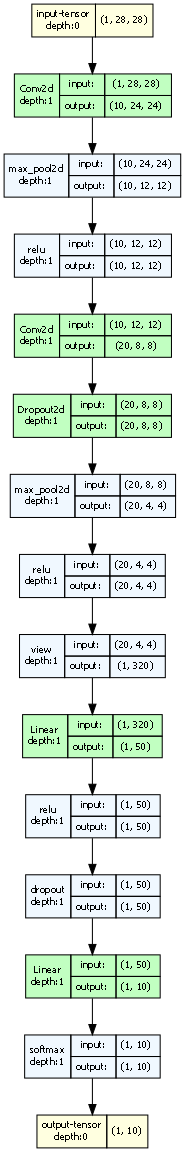

In [31]:
test = load_dataset(r'data\transformed\cifar-only-0',flat=True)
test_dataloader = DataLoader(test,batch_size=32)

In [33]:
for i,l in test_dataloader:
    break

In [34]:
i.shape

torch.Size([32, 3072])

In [ ]:
test = load_dataset(r'data\transformed\cifar-only-0',flat=True)

In [8]:
for xd in i:
    print(xd)
    break

tensor(0.3529)


In [10]:
run_loop = False
for img, l in test:
  
  if not run_loop:
    iks_statistics = []
    iks = IKSSW(img) 
  
  if run_loop:
    for val in img:
      if iks.Test(): 
        iks.Update()
        print('Drift detected')
        
      iks.Increment(val)

      iks_statistics.append(iks.KS())
      break_loops = True

KeyboardInterrupt: 